Ordinary kriging model to predict DBH of trees. Uses the pykrige package. Presents different models with different variogram options. 

Imports

In [1]:
import geostatspy.GSLIB as GSLIB                        # GSLIB utilities, visualization and wrapper
from pykrige.ok import OrdinaryKriging
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting

Loading in the synthetic data for 1000 trees.

In [2]:
fraction_data = 1.0

df = pd.read_csv("../data/1000_trees.csv") 

if fraction_data < 1.0:
    df = df.sample(frac = fraction_data,replace = False,random_state = 73073)
df = df.reset_index()
df = df.iloc[:,1:] # excludes first columns, which is the index. 
print(df.head())

        dbh    species     x_pos      y_pos
0  0.205288   oak tree  8.815514  10.997415
1  0.301855  pine tree  7.895240   9.050172
2  0.282535  pine tree  4.398173   9.282438
3  0.204056   oak tree  7.651061   1.671802
4  0.287978   oak tree  4.894493   7.916996


some stats about the data

In [3]:
print(df.describe().transpose())

        count      mean       std       min       25%       50%       75%  \
dbh    1000.0  0.225138  0.047320  0.118364  0.189283  0.220274  0.258005   
x_pos  1000.0  6.166825  3.484326  0.004157  3.193588  6.251270  9.210799   
y_pos  1000.0  5.979333  3.514977  0.007042  2.949760  5.862608  9.103450   

             max  
dbh     0.401343  
x_pos  11.998779  
y_pos  11.977424  


distribution of the DBH values

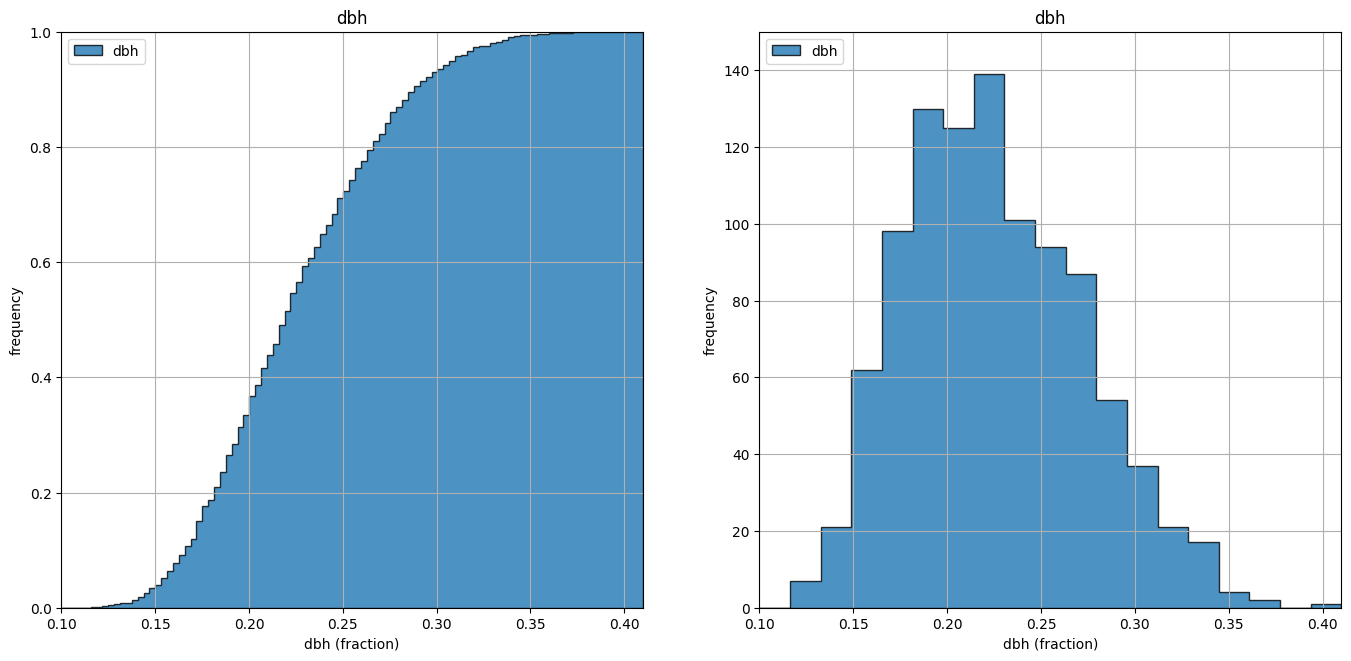

In [4]:
xmin = 0.0; xmax = 12.0
ymin = 0.0; ymax = 12.0
vmin = 0.10; vmax = 0.41

plt.subplot(121) # This creates a subplot grid with 1 row and 1 columns and selects the first subplot (index 1).
plt.hist(df['dbh'],bins=np.linspace(vmin,vmax,100),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',label='dbh')
# bins = np.linspace defines the bin edges for the histogram - 1000 bins btwn 0.0 and 0.25. 
# alpha = transparency
# density = True -> normalizes to become a probability density
plt.xlim([vmin,vmax]); plt.ylim([0,1.0])
plt.xlabel('dbh (fraction)'); plt.ylabel('frequency'); plt.title('dbh')
plt.legend(loc='upper left')
plt.grid(True)


plt.subplot(122) 
plt.hist(df['dbh'],bins=np.linspace(vmin,vmax,20),histtype="stepfilled",alpha=0.8,edgecolor='black',label='dbh')
plt.xlim([vmin, vmax]); plt.ylim([0,150])
plt.xlabel('dbh (fraction)'); plt.ylabel('frequency'); plt.title('dbh')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

visualization of the data

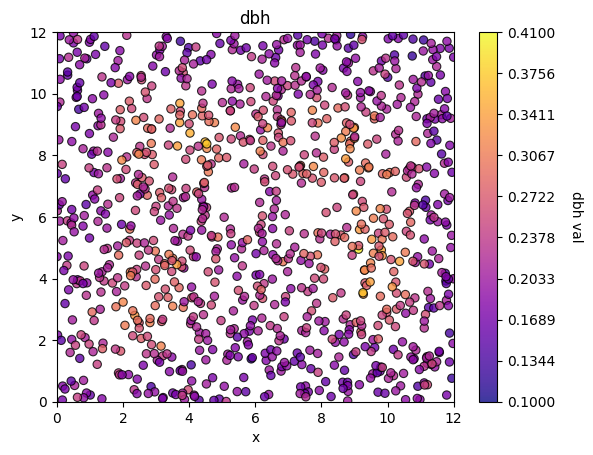

In [5]:
cmap = plt.cm.plasma
plt.subplot(111)

GSLIB.locmap_st(df, 'x_pos', 'y_pos', 'dbh', xmin, xmax, ymin, ymax, vmin, vmax, 'dbh', 'x', 'y', 'dbh val', cmap)
plt.show()

create the kriging model with each type of variogram model

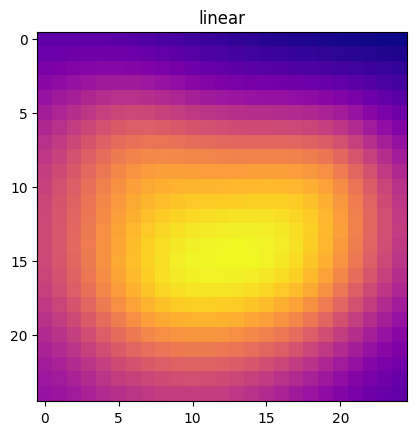

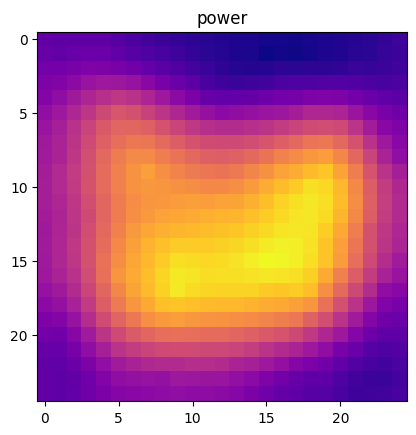

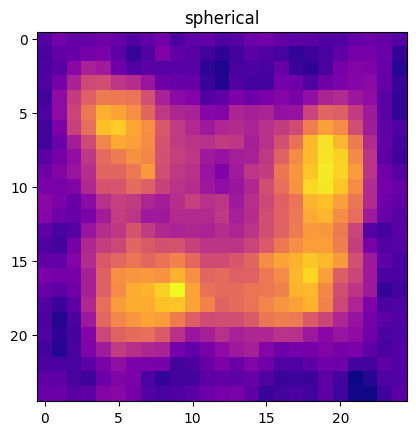

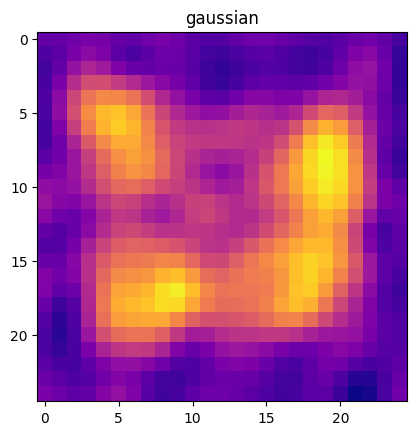

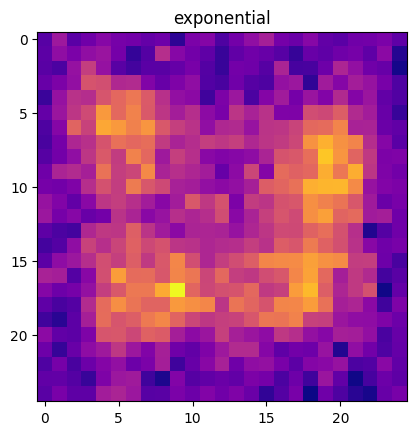

In [6]:
def execute_kriging(model):
    OK = OrdinaryKriging(df['x_pos'], df['y_pos'], df['dbh'], variogram_model = model, verbose = False, enable_plotting = False)
    gridx = np.arange(0.0, 12.5, 0.5)
    gridy = np.arange(0.0, 12.5, 0.5)
    z, ss = OK.execute("grid", gridx, gridy)
    plt.imshow(z, cmap="plasma")
    plt.title(model)
    plt.show()

models = ["linear", "power", "spherical", "gaussian", "exponential"]

for m in models:
    execute_kriging(m)